In [19]:
import pandas as pd

snps_all=pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/rqtls/k562.sign.id.LP190708.txt.gz", sep="\t", header=0)

preds = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/rqtls/preds_fold0_k562_sig_new/snp_scores.tsv", sep="\t", header=0)

In [20]:
preds.head()
preds[snps_all.columns] = preds["META_DATA"].str.split(",", expand=True)
preds["POS1"] = preds["POS0"] + 1


sig_cols = preds.columns.tolist()

preds[sig_cols[0:2]+[sig_cols[-1]]+sig_cols[2:-1]].to_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/rqtls/preds_fold0_k562_sig_new/snp_scores_bed_format.bed", sep="\t", header=False, index=False)

In [21]:
import matplotlib.pyplot as plt

In [22]:
preds = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/rqtls/preds_fold0_k562_sig_new/snp_scores_bed_format_inpeaks.bed", sep="\t", header=None)



In [23]:
preds.columns = sig_cols[0:2]+[sig_cols[-1]]+sig_cols[2:-1]

In [24]:
preds.head()

,CHR,POS0,POS1,REF,ALT,META_DATA,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff,chr,SNP_ID,SNPabspos,ref.element.count,alt.element.count,k562.ref.mean,k562.alt.mean,k562.wilcox.p.value,k562.wilcox.p.value.random,ref,alt
0,chr10,100743726,100743727,T,G,"chr10,rs56388618,100743727,280,26,4.8840568072...",-0.005992,-10.414602,-0.006427,chr10,rs56388618,100743727,280,26,4.884057,0.480017,5.445846e-04,0.905921,T,G
1,chr10,100743862,100743863,G,A,"chr10,rs72836788,100743863,249,31,5.2643650822...",-0.018527,-13.355741,-0.009208,chr10,rs72836788,100743863,249,31,5.264365,1.078311,3.179459e-03,0.531716,G,A
2,chr10,106877985,106877986,T,C,"chr10,rs12261208,106877986,300,100,1.013868211...",0.362648,204.451080,0.091435,chr10,rs12261208,106877986,300,100,1.013868,4.152651,7.011662e-19,0.419985,T,C
3,chr10,123102327,123102328,A,G,"chr10,rs538962968,123102328,245,48,3.110560927...",0.211769,119.385520,0.052581,chr10,rs538962968,123102328,245,48,3.110561,7.604341,5.229041e-03,0.095112,A,G
4,chr10,1273019,1273020,T,C,"chr10,rs7092481,1273020,115,180,33.34941992340...",-0.368375,-194.754790,-0.087116,chr10,rs7092481,1273020,115,180,33.349420,7.266472,1.742633e-12,0.329079,T,C


In [25]:
preds.shape

(580, 20)

Text(0.5, 1.0, 'Pearsonr = 0.39')

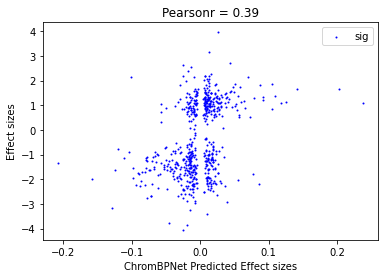

In [26]:
import numpy as np
from scipy.stats import pearsonr

preds["Z_score_fixed"] = np.log2((preds["k562.alt.mean"]+1)/(preds["k562.ref.mean"]+1))
plt.scatter(preds["probs_jsd_diff"], preds["Z_score_fixed"].astype(float), s=1, c="b", label="sig")


plt.xlabel("ChromBPNet Predicted Effect sizes")
plt.ylabel("Effect sizes")
plt.legend()
plt.title("Pearsonr = "+str(np.round(pearsonr(preds["probs_jsd_diff"], preds["Z_score_fixed"].astype(float))[0],2)))

